In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,3)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [13]:
# Config
DATA_DIR = '/Users/Pereiro/.julia/dev/RegulationImageMC_2024/data/0.2.0-ecoli.core/sklearn'

In [14]:
# Load Raw Data
dfpath = os.path.join(DATA_DIR, 'fba.features.df.7809.csv')
rawdata = pd.read_csv(dfpath)

In [15]:
# Define data set
X = rawdata.drop('downset.hash', axis=1)

In [16]:
# 1. Standardizzare i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Determinare il numero ottimale di cluster usando il metodo del gomito
inertia = []
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

K = range(2, 25) # Numero di cluster da 2 a 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


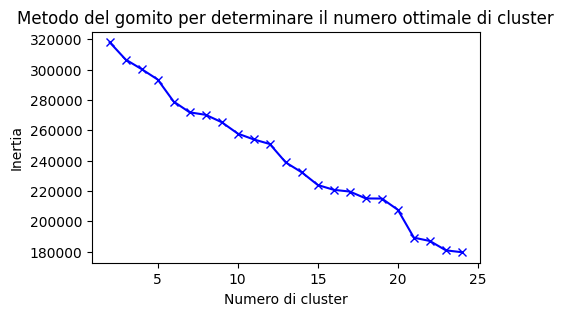

In [17]:
# Tracciare i risultati per il metodo del gomito
plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('Numero di cluster')
plt.ylabel('Inertia')
plt.title('Metodo del gomito per determinare il numero ottimale di cluster')
plt.show()

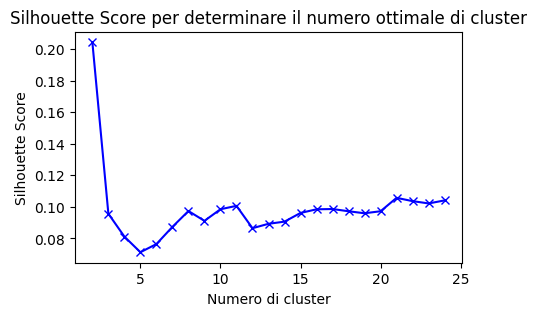

In [18]:
plt.figure()
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Numero di cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per determinare il numero ottimale di cluster')
plt.show()

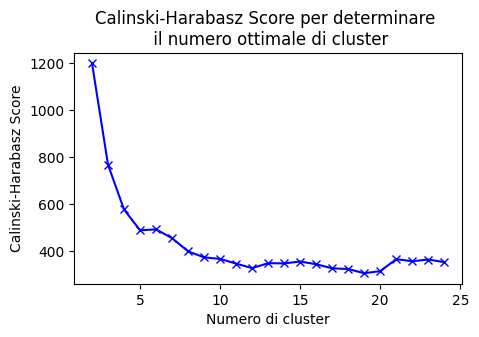

In [19]:
# Tracciare i risultati per il coefficiente di Calinski-Harabasz
plt.figure()
plt.plot(K, calinski_harabasz_scores, 'bx-')
plt.xlabel('Numero di cluster')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score per determinare \n il numero ottimale di cluster')
plt.show()

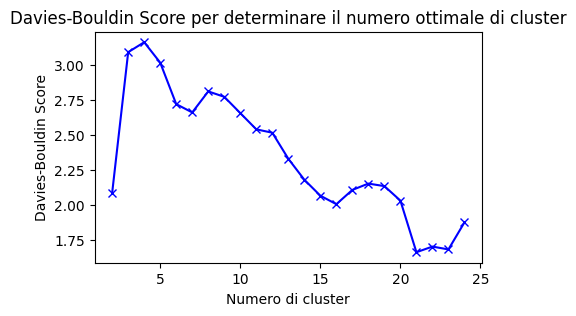

In [20]:
# Tracciare i risultati per il coefficiente di Davies-Bouldin
plt.figure()
plt.plot(K, davies_bouldin_scores, 'bx-')
plt.xlabel('Numero di cluster')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score per determinare il numero ottimale di cluster')
plt.show()